In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
latest_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

Text(0.5, 0, 'Date')

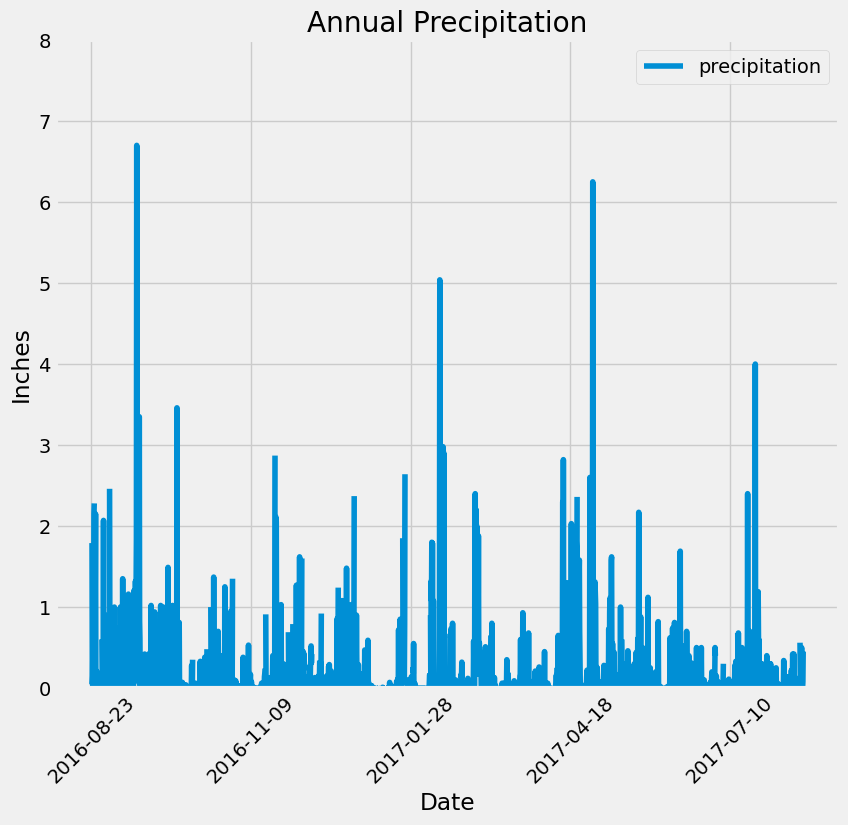

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.

last_year = most_recent - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(precipitation, columns = ['Date', 'precipitation'])

precipitation_df.set_index('Date', inplace=True)

# Sort the dataframe by date

precipitation_df=precipitation_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(title = 'Annual Precipitation' , figsize = (9,8), rot = 45)
plt.legend(loc = 'upper right')
plt.ylim(0,8)
plt.ylabel('Inches')
plt.xlabel('Date')

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset

session.query(func.distinct(measurement.station)).count()


9

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

active_stations = session.query(measurement.station,
                    func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

# List the stations and the counts in descending order.

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()[0]
print(f"The temp. info for station USC00519281 is the following:\nLow: {active_stations[0]}\nHigh: {active_stations[1]}\nAvg: {round(active_stations[2],2)}")

The temp. info for station USC00519281 is the following:
Low: 54.0
High: 85.0
Avg: 71.66


In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_station = session.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").\
    filter(measurement.date >= last_year).all()

yearly_station

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [34]:
year_df = pd.DataFrame(yearly_station)

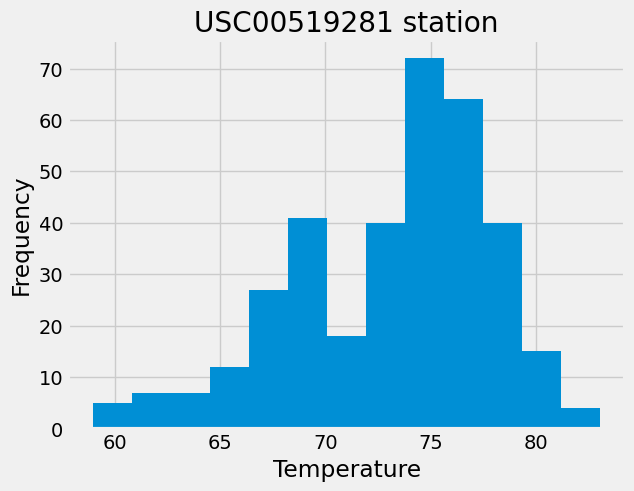

In [35]:
year_df.hist(bins=13)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('USC00519281 station')
plt.show()

# Close session

In [36]:
# Close Session
session.close()